In [114]:
## Importing ncessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

In [115]:
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\MY_NOTEBOOKS\Customer Segmentation\Mall_Customers.csv")

In [116]:
# Display the first five rows
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [117]:
# Check basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [118]:
# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Exploratory Data Analysis (EDA)
## Univariate Analysis

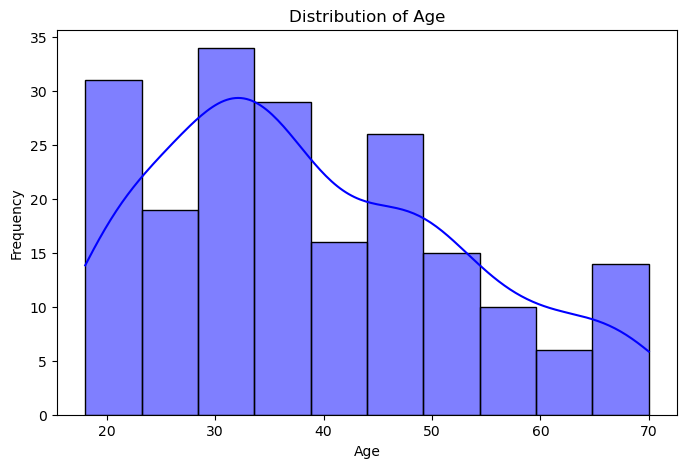

In [119]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde = True, bins = 10, color = 'blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

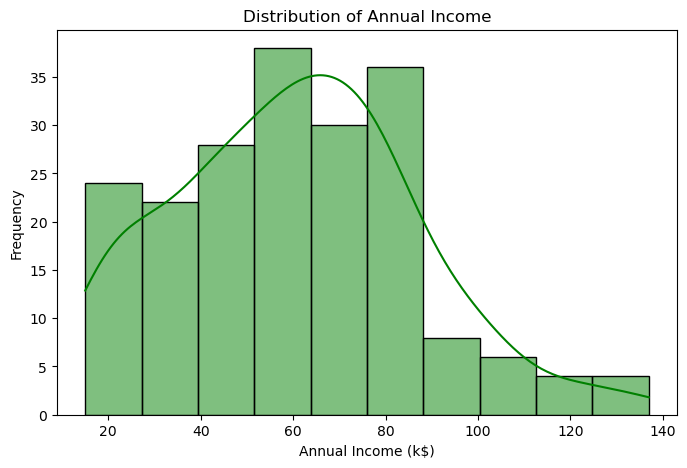

In [120]:
# Distribution of Annual Income
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual Income (k$)'], kde = True, bins = 10, color = 'green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()


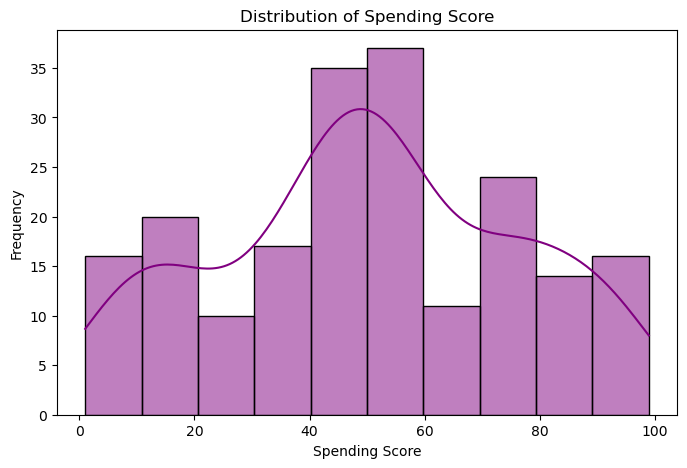

In [121]:
# Distribution of Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(data['Spending Score (1-100)'], kde = True, bins = 10, color = 'purple')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()


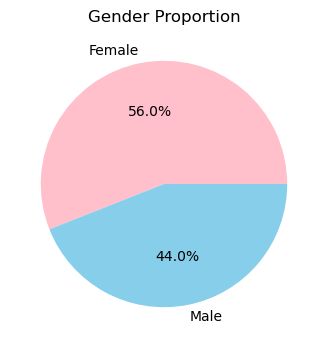

In [122]:
# Gender Proportion
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', colors=['pink', 'skyblue'])
plt.title('Gender Proportion')
plt.ylabel('')
plt.show()

# Bivariate Analysis
## 1. Relationship Between Annual Income and Spending Score

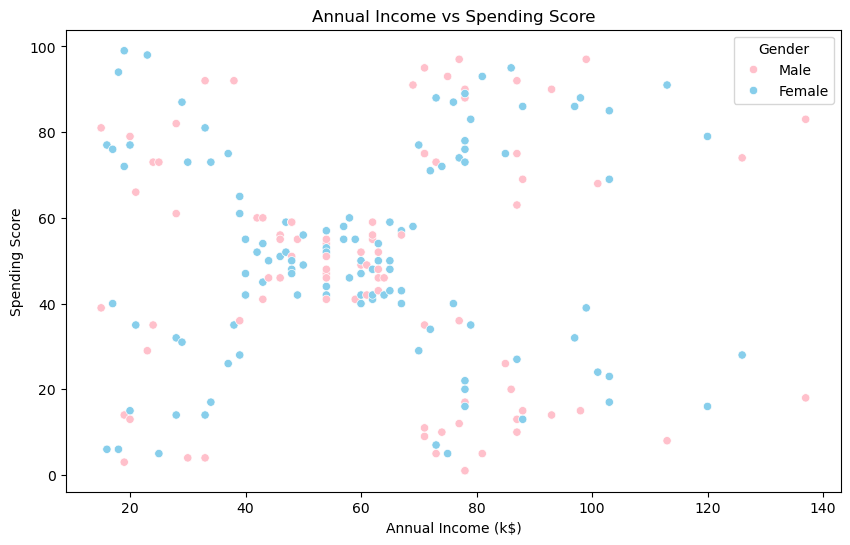

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Gender'],
    palette=['pink', 'skyblue']
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()


# Scatterplot Analysis

## Concentration at Income 50k and Spending Score 50:
Many customers fall into the "average spender and earner" category.

## Low Income, High Spending vs. High Income, Low Spending:
Varying spending behavior are not strictly tied to income levels. High earners may spend conservatively, while low earners may prioritize spending.

## Similar Spending Behavior for Males and Females:
Gender does not strongly influence spending at similar income levels.

## Trend Relationship:
The relationship doesn't appear to be linear

## 2. Boxplots for Gender Influence


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8020\4127722226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Gender'], y=data['Spending Score (1-100)'], palette=['pink', 'skyblue'])


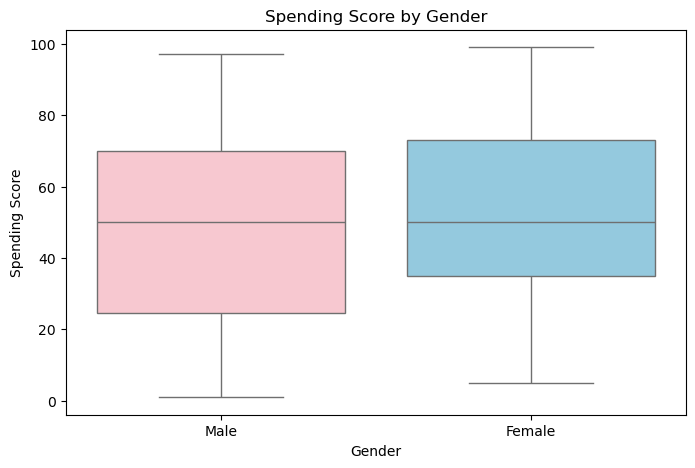

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8020\4127722226.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Gender'], y=data['Annual Income (k$)'], palette=['pink', 'skyblue'])


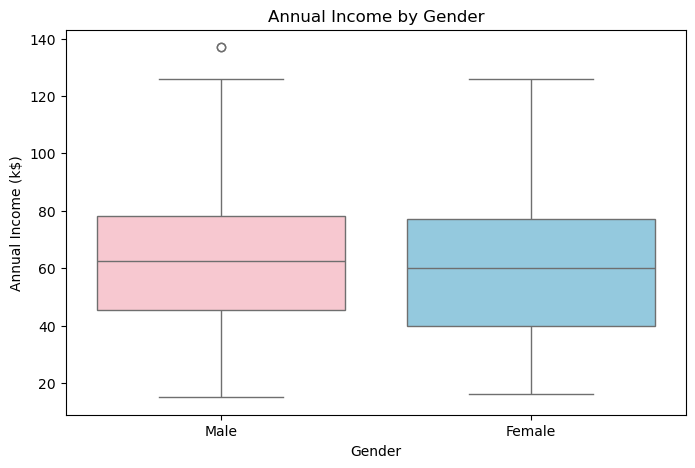

In [124]:
# Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Gender'], y=data['Spending Score (1-100)'], palette=['pink', 'skyblue'])
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

# Annual Income by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Gender'], y=data['Annual Income (k$)'], palette=['pink', 'skyblue'])
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()


# Boxplot Analysis

## Median Differences:
There are slight differences in spending behavior by gender. Females are more likely to have spending scores above the median, while males are below.

 ## Income Distribution Differences:
There is equal male distribution and female dominance below the median indicate possible differences in earning patterns, which may influence spending behavior.

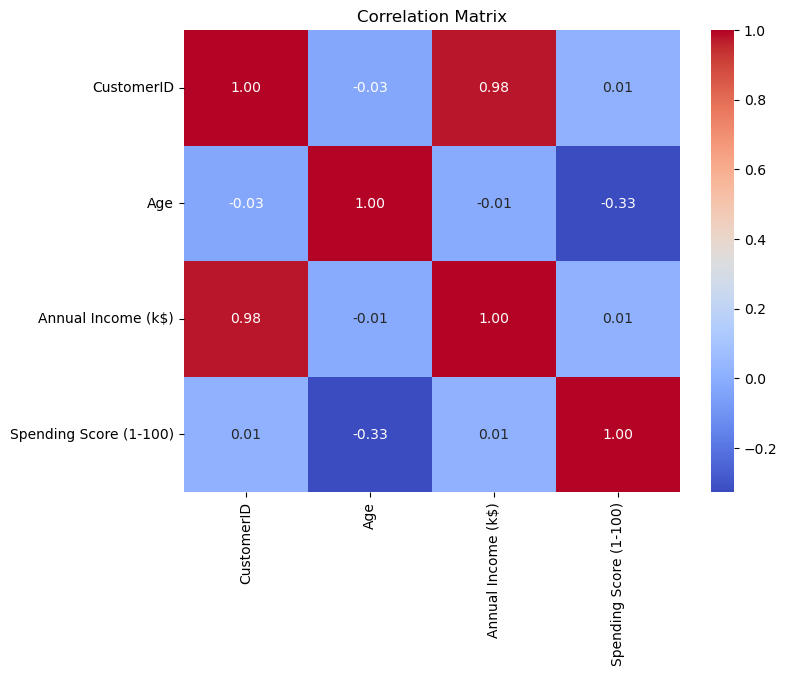

In [125]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The Correlation Coefficient Range is 1.0 which proves a  Perfect positive relationship.
Between Annual Income and Spending Score: The correlation is 0.01, which is close to 0. This suggests no significant linear relationship between income and spending score. Higher income does not necessarily mean higher spending.
Between Age and Spending Score: The correlation is -0.33, indicating a weak negative relationship. This suggests that as age increases, spending scores tend to decrease slightly.

In [126]:

# Summary statistics by Gender
gender_stats = data.groupby('Gender')[['Annual Income (k$)', 'Spending Score (1-100)']].describe()
print(gender_stats)


       Annual Income (k$)                                                  \
                    count       mean        std   min    25%   50%    75%   
Gender                                                                      
Female              112.0  59.250000  26.011952  16.0  39.75  60.0  77.25   
Male                 88.0  62.227273  26.638373  15.0  45.50  62.5  78.00   

              Spending Score (1-100)                                        \
          max                  count       mean       std  min   25%   50%   
Gender                                                                       
Female  126.0                  112.0  51.526786  24.11495  5.0  35.0  50.0   
Male    137.0                   88.0  48.511364  27.89677  1.0  24.5  50.0   

                    
         75%   max  
Gender              
Female  73.0  99.0  
Male    70.0  97.0  


## Summary Statistics by Gender
### Annual Income:
Females have a slightly lower mean income (59.25k) compared to males (62.23k).
Both genders have a similar income range, with males showing a slightly higher standard deviation, indicating more variation in male incomes.
### Spending Score:
Females have a higher average spending score (51.53) compared to males (48.51).
The standard deviation for males is higher (27.9 vs. 24.1), meaning male spending scores vary more than females.
The median spending score is the same (50) for both genders, but the interquartile range (IQR) for females is slightly higher (35 to 73) than males (24.5 to 70).

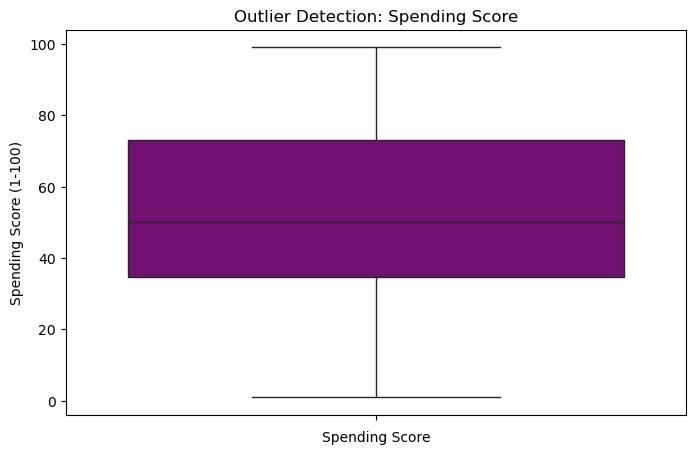

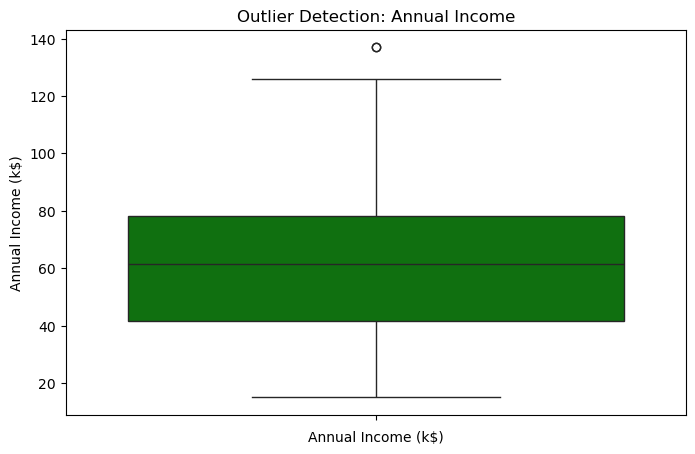

In [127]:
# Boxplot for Spending Score to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data['Spending Score (1-100)'], color='purple')
plt.title('Outlier Detection: Spending Score')
plt.xlabel('Spending Score')
plt.show()

# Boxplot for Annual Income to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data['Annual Income (k$)'], color='green')
plt.title('Outlier Detection: Annual Income')
plt.xlabel('Annual Income (k$)')
plt.show()


## Outlier Detection
### Spending Score:
No visible outliers. All data points fall within the whiskers.
Most spending scores lie between 35 and 73 for females and 24.5 and 70 for males.
Annual Income:
A single outlier is observed above 120k. This could represent an exceptionally high-earning customer. It’s worth checking the CustomerID for this data point to decide if it’s valid or should be treated separately.

In [128]:
# Isolating and analyzing the outlier.
# Upper Whisker=Q3+1.5×IQR
# Step 1: Calculate Q1, Q3, and IQR for Annual Income
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate Upper Whisker
upper_whisker = Q3 + 1.5 * IQR

# Step 3: Isolate Outliers
outliers = data[data['Annual Income (k$)'] > upper_whisker]

# Display Outlier(s)
print(outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


## Low Spending Score for High Income (CustomerID 199):
This could indicate frugal spending behavior despite a high income.
The customer might not see value in the products/services offered.

## High Spending Score for High Income (CustomerID 200):
This customer is likely a high-value client for the business, given their spending behavior matches their income.

## Gender and Income Relationship:
Although the dataset might suggest males dominate at higher income levels, further analysis of gender distribution across income brackets is necessary to confirm any trends.